# Project: Geo-pulse

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

---

## 2. Data Dictionary

| no | Column name | Column Description|
|---|---|---|
| 1 | id | area id|
| 2 | hour | hour of data|
| 3 | f_profile_customer_segment | There are four main location-based customer segments: Residents, Workers, Work at Home, Visitors - Residents are people who spend home hours in the area, Workers are people who spend work hours in the area, Work at Home refers to people who are both residents and workers in the area, and Visitors are people who are neither residents or workers in the area |
| 4 | Density | Number of customer who visited in the area|
| 5 | prepaid_user | prepaid subscription|
| 6 | postpaid_user| postpaid subscription|
| 7 | gender_male| the gender distribution of customer who visited in the area|
| 8 | gender_female ||
| 9 | gender_unknown||
| 10| age_1_19 | the age distribution of customer who visited in the area|
| 11 | age_20_29||
| 12 | age_30_39||
| 13 | age_40_49||
| 14 | age_50_59||
| 15 | age_more_than_60||
| 16 | 0_no_payment| the monthly bill payment distribution of TrueMove H customers in the area: Prepaid - Monthly Top Up, Postpaid - Monthly Bill Payment, No Payment refers to Prepaid users who did not top up in that month and Postpaid users who did not pay in that month (paid in advance/paid late).|
| 17 | 1_pay_0to99||
| 18 | 2_pay_100to199||
| 19 | 3_pay_200to599||
| 20 | 4_pay_600to999||
| 21 | 5_pay_1000_ ||
| 22 | music_streamer_user| Number of customer who have usage on music application (JOOK,spotify,coolism,etc.)|
| 23 | video_streaming_app_user| Number of customer who have usage on VDO streaming application (Netflix,TrueID,WeTV,etc.)|
| 24 | merchant_app_user| Number of customer who have usage on merchant application (SCB Mae manee,KTB pao tung,etc.)|
| 25 | bank_app_user| Number of customer who have a usage on bank application (SCB,K Plus,KTB, etc.)|
| 26 | fastfood_app_user| Number of customer who have a usage on Fast food application (The Pizza Company,Mc Donalds,KFC,etc.)|
| 27 | food_delivery_app_user| Number of customer who have a usage on Food Delivery application (GRAB,LINE Man,Foodpanda,etc.)|
| 28 | grocery_delivery_app_user| Number of customer who have a usage on grocery Delivery application (7-11,Makro click,Lotus's,etc.)|
| 29 | online_shopping_user| Number of customer who have a usage on Online shopping application (Shopee,Lazada,JD Central,etc.)|
| 30 | inte_coffee_lover| Number of customer who are interested in coffee.|
| 31 | inte_travel_and_information | Number of customer who interested in travel.|
| 32 | inte_investment             | Number of customer who interested in investment (Finance Investment,Digital Currency,etc.)|
| 33 | inte_realestate             | Number of customer who interested in realestate.|
| 34 | inte_insurance              | Number of customer who interested in insurance.|
| 35 | inte_automobile             | Number of customer who interested in automotive(car band and car content). |
| 36 | inte_fitness_and_wellness   | Number of customer who interested in fitness and wellness.|
| 37 | par_day                     | date of data (2020 - Nov - 04 : Wednesday)|

**Note on the data:**
- The data is taken from 04-November-2020
- Each row correspond to each 250 x 250 sqm grid, an hour of data from those grid is selected randomly 
- Application usage is detected by internet usage within each application, for example if someone uses a music streaming application that is connected to Truemove H internet that person will be labeled as `music_streamer_user`.
- Interests are tracked based on search data and how much time those people spend on each topic of interests, for example if someone searches about investments a lot, that person will be labeled as `inte_investment`.

---

## 3. Reading the data

In [2]:
# reading encoded area id - encoded area_codes was editted in a 
area_id = pd.read_excel('../data/geo_data_encode.xlsx')

In [3]:
# reading geo_data
df = pd.read_excel('../data/geo_data.xlsx')

In [4]:
# checking shape
df.shape

(1100, 36)

In [5]:
# renaming columns
df.columns = ['hour', 'segment', 'density', 'pre_paid',
       'post_paid', 'gender_male', 'gender_female', 'gender_unknown',
       'age_1_19', 'age_20_29', 'age_30_39', 'age_40_49', 'age_50_59',
       'age_60+', 'pay_no_payment', 'pay_0to99', 'pay_100to199',
       'pay_200to599', 'pay_600to999', 'pay_1000+', 'inte_coffee_lover',
       'music_streamer_user', 'video_streaming_app_user', 'merchant_app_user',
       'bank_app_user', 'fastfood_app_user', 'food_delivery_app_user',
       'grocery_delivery_app_user', 'online_shopping_user',
       'inte_travel_and_information', 'inte_investment', 'inte_realestate',
       'inte_insurance', 'inte_automobile', 'inte_fitness_and_wellness',
       'par_day']

**Correction to segment anotation to match the data dictionary**

In [6]:
# mapping customer_profile_segment to match the data dictionary
df['segment'] = df['segment'].map(
    lambda x : 'work_at_home' if x == 'same_resident_and_work' else x)

**Added area_code from encoded file**

In [7]:
# reassign area_code to main dataset
df.insert(0, "area_code", area_id['id'])

**Grouping of columns**

In [8]:
# defining column groups
GENDER = df.columns[df.columns.str.contains('gender_')].to_list()
AGE = df.columns[df.columns.str.contains('age_')].to_list()
PAID = df.columns[df.columns.str.contains('_paid')].to_list()
PLAN = df.columns[df.columns.str.contains('pay_')].to_list()
USER = df.columns[df.columns.str.contains('_app_user')].to_list()
INTE = df.columns[df.columns.str.contains('inte_')].to_list()

col_cat = [GENDER,AGE,PAID,PLAN,USER,INTE]
col_cat_name = ['Gender','Age','Post/Pre Paid',
                'Package Plan','Usage','Interests']

In [9]:
print(f"Total population density of the dataset: {df['density'].sum()}")
print('Checking total population density of column groups')
print('-'*30)

for n,col in enumerate(col_cat):
    print(f"{n+1}. {col_cat_name[n]} columns: {df[col].sum().sum()}")
print('-'*30)

Total population density of the dataset: 55282
Checking total population density of column groups
------------------------------
1. Gender columns: 55282
2. Age columns: 55282
3. Post/Pre Paid columns: 55282
4. Package Plan columns: 55282
5. Usage columns: 76577
6. Interests columns: 40058
------------------------------


Age, Post/Pre Paid, and Usage are a breakdown of population density, they all combined to the population density. Usage and interests a tally of the populations usage and interest.

**Creating time of day column**
- Morning : 5-9
- Work : 9-17
- Afterwork : 17-23
- Sleep : 23-5

In [10]:
# Generating a column called time of day
df['time_of_day'] = df['hour'].map(
    lambda x : np.select([(x>5) & (x<=9),
                          (x>9) & (x<=17),
                          (x>17) & (x<=23)],
                         ['Morning','Work','Afterwork'],'Sleep'))

**Creating a percentage column**

In [11]:
# Creating pct columns
for groups in [GENDER,AGE,PAID,PLAN,USER,INTE]:
    for col in groups:
        new_col_name = 'pct_'+col
        df[new_col_name] = df[col]/df['density']

In [12]:
df.head()

area_code  hour  segment  density  pre_paid  post_paid  gender_male  \
0  BAAACBIH    18  visitor       28         9         19            5   
1  BAAACBIH    17  visitor       21        10         11            6   
2  BAAHEBJC     1  visitor       37        17         20           10   
3  BAEFBBAC    16   worker       43        21         22           11   
4  BAJKABJB    12  visitor       21        12          9            8   

   gender_female  gender_unknown  age_1_19  ...  pct_fastfood_app_user  \
0             11              12         6  ...               0.035714   
1              7               8         3  ...               0.000000   
2              8              19         8  ...               0.027027   
3              9              23         5  ...               0.000000   
4              6               7         3  ...               0.000000   

   pct_food_delivery_app_user  pct_grocery_delivery_app_user  \
0                    0.392857                       0.107143   
1                    0.190476                       0.142857   
2                    0.189189                       0.027027   
3                    0.186047                       0.186047   
4                    0.190476                       0.190476   

   pct_inte_coffee_lover  pct_inte_travel_and_information  \
0               0.357143                         0.142857   
1               0.380952                         0.047619   
2               0.162162                         0.027027   
3               0.116279                         0.069767   
4               0.190476                         0.000000   

   pct_inte_investment  pct_inte_realestate  pct_inte_insurance  \
0             0.107143             0.071429            0.000000   
1             0.095238             0.000000            0.000000   
2             0.054054             0.000000            0.000000   
3             0.069767             0.093023            0.069767   
4             0.000000             0.000000            0.000000   

   pct_inte_automobile  pct_inte_fitness_and_wellness  
0             0.107143                       0.107143  
1             0.000000                       0.000000  
2             0.108108                       0.081081  
3             0.116279                       0.093023  
4             0.047619                       0.047619  

[5 rows x 68 columns]

**Re-order and select columns**

In [13]:
df_copy = df['inte_coffee_lover'].copy()
df.drop(columns=['inte_coffee_lover'],inplace=True)
df.insert(29, "inte_coffee_lover", df_copy)

**Drop unused columns**

In [14]:
df.drop(columns=['par_day'], inplace=True)

In [15]:
# Checking area code
print(f"There are {df['area_code'].nunique()} unique area_code in this dataset")

There are 992 unique area_code in this dataset


Which means analysing the flow of customer segment without each area_code is off the table, as most of the rows are from unique area_codes. We will look at this dataset as a random snapshot of Bangkok at different locations and at different time of the day. Think of this as sampling from Bangkok population.

We will be doing a clustering of `area_code` to gather insights of this town. We will keep only the one with highest number of `density` as this should be the best representative of the grid.

In [16]:
# create a copy before sorting
df_copy = df.copy()

In [17]:
#df_copy = df_copy.sort_values(by = 'density', ascending = False).drop_duplicates(['area_code'], keep= 'first')
df_copy = df_copy.drop_duplicates(['area_code'], keep= 'first')

In [18]:
df_copy = df_copy.reset_index(drop=True)

In [19]:
df_copy.shape

(992, 67)

In [20]:
df_copy.head()

area_code  hour       segment  density  pre_paid  post_paid  gender_male  \
0  BAAACBIH    18       visitor       28         9         19            5   
1  BAAHEBJC     1       visitor       37        17         20           10   
2  BAEFBBAC    16        worker       43        21         22           11   
3  BAJKABJB    12       visitor       21        12          9            8   
4  BAFAJJAH    11  work_at_home       31        11         20            6   

   gender_female  gender_unknown  age_1_19  ...  pct_fastfood_app_user  \
0             11              12         6  ...               0.035714   
1              8              19         8  ...               0.027027   
2              9              23         5  ...               0.000000   
3              6               7         3  ...               0.000000   
4              7              18         3  ...               0.000000   

   pct_food_delivery_app_user  pct_grocery_delivery_app_user  \
0                    0.392857                       0.107143   
1                    0.189189                       0.027027   
2                    0.186047                       0.186047   
3                    0.190476                       0.190476   
4                    0.193548                       0.096774   

   pct_inte_coffee_lover  pct_inte_travel_and_information  \
0               0.357143                         0.142857   
1               0.162162                         0.027027   
2               0.116279                         0.069767   
3               0.190476                         0.000000   
4               0.354839                         0.032258   

   pct_inte_investment  pct_inte_realestate  pct_inte_insurance  \
0             0.107143             0.071429            0.000000   
1             0.054054             0.000000            0.000000   
2             0.069767             0.093023            0.069767   
3             0.000000             0.000000            0.000000   
4             0.064516             0.064516            0.000000   

   pct_inte_automobile  pct_inte_fitness_and_wellness  
0             0.107143                       0.107143  
1             0.108108                       0.081081  
2             0.116279                       0.093023  
3             0.047619                       0.047619  
4             0.129032                       0.032258  

[5 rows x 67 columns]

In [21]:
# save to csv
df_copy.to_csv('../data/geo_cleaned.csv')

---

## Generate randomized grid layouts to mock up original product

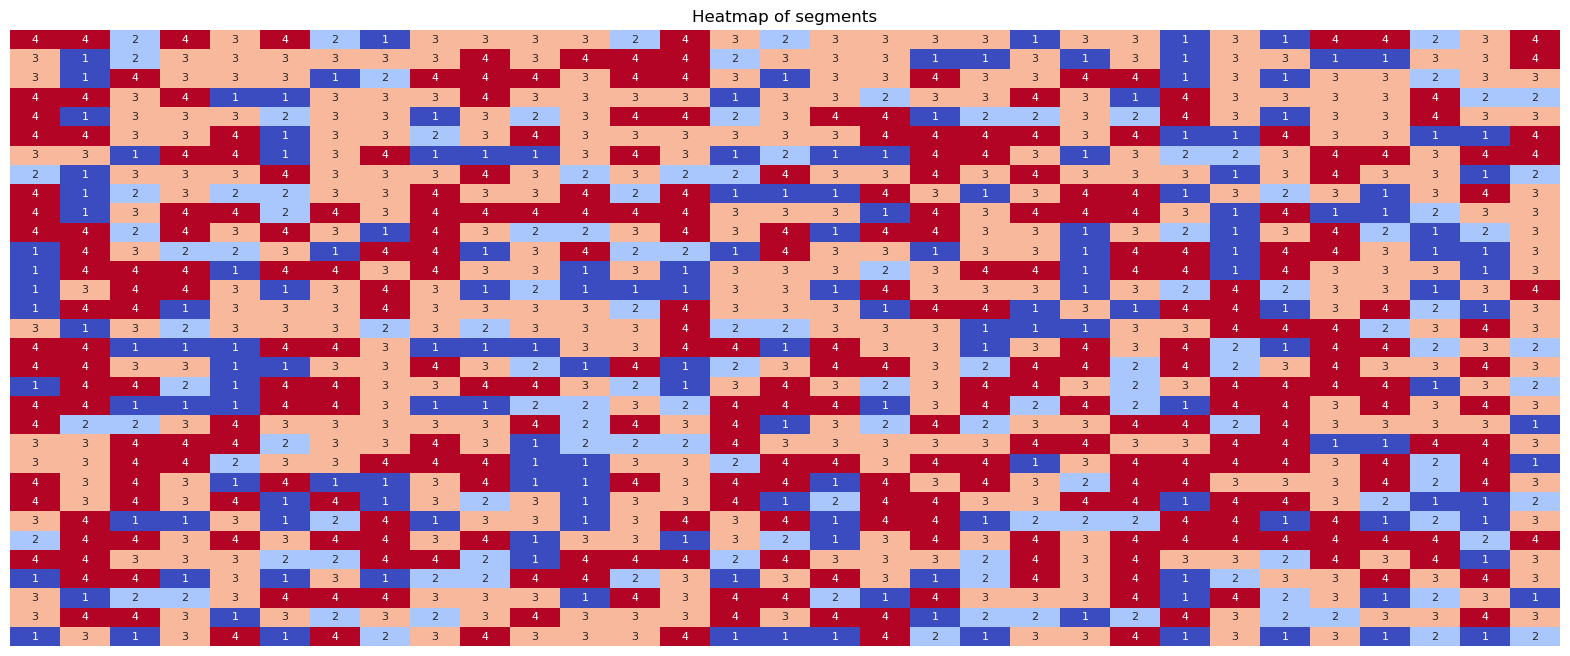

In [22]:
subset = df_copy['segment']
subset = subset.map({'resident':1,'worker':2,'work_at_home':3,'visitor':4})
grids = np.reshape(np.array(subset.values),(32,31))

plt.figure(figsize = (20,8))
plt.title(f'Heatmap of segments')
sns.heatmap(grids,annot=True,
            annot_kws={"fontsize":8}, fmt='g',
            cmap='coolwarm',xticklabels=False,yticklabels=False,
            cbar=False);

# 1 - Resident
# 2 - Worker
# 3 - Work at home
# 4 - Visitor

**Create a function to mockup grid laying over a map**
- geopulse_mock_subset: takes subset into account
- geopulse-mock: function for whole dataset

In [23]:
def geopulse_mock_subset(feature,segment):
    subset = df_copy[['segment',feature]].copy()
    subset['zero'] = 0
    subset['filtered'] = np.where(subset['segment']==segment,subset[feature],subset['zero'])
    heatmap_data = np.reshape(np.array(subset['filtered']),(32,31))
    
    map_img = mpimg.imread('../image/geopulsepic.jpeg') 

    plt.figure(figsize=(20,10))
    hmax = sns.heatmap(heatmap_data,
                cmap = 'coolwarm',
                alpha = 0.6, 
                annot = True,
                annot_kws={"fontsize":8}, fmt='g',
                zorder = 2, yticklabels=False,xticklabels=False)

    hmax.imshow(map_img,
            aspect = hmax.get_aspect(),
            extent = hmax.get_xlim() + hmax.get_ylim(),
            zorder = 1); #put the map under the heatmap

In [24]:
def geopulse_mock(feature):
    subset = df_copy[feature]
    heatmap_data = np.reshape(np.array(subset),(32,31))

    map_img = mpimg.imread('../image/geopulsepic.jpeg') 

    plt.figure(figsize=(20,10))
    hmax = sns.heatmap(heatmap_data,
                cmap = 'coolwarm',
                alpha = 0.6, 
                annot = True,
                annot_kws={"fontsize":8}, fmt='g',
                zorder = 2,yticklabels=False,xticklabels=False)

    hmax.imshow(map_img,
            aspect = hmax.get_aspect(),
            extent = hmax.get_xlim() + hmax.get_ylim(),
            zorder = 1) #put the map under the heatmap
            
    plt.show()

**Mock Grid of Coffee Lovers**

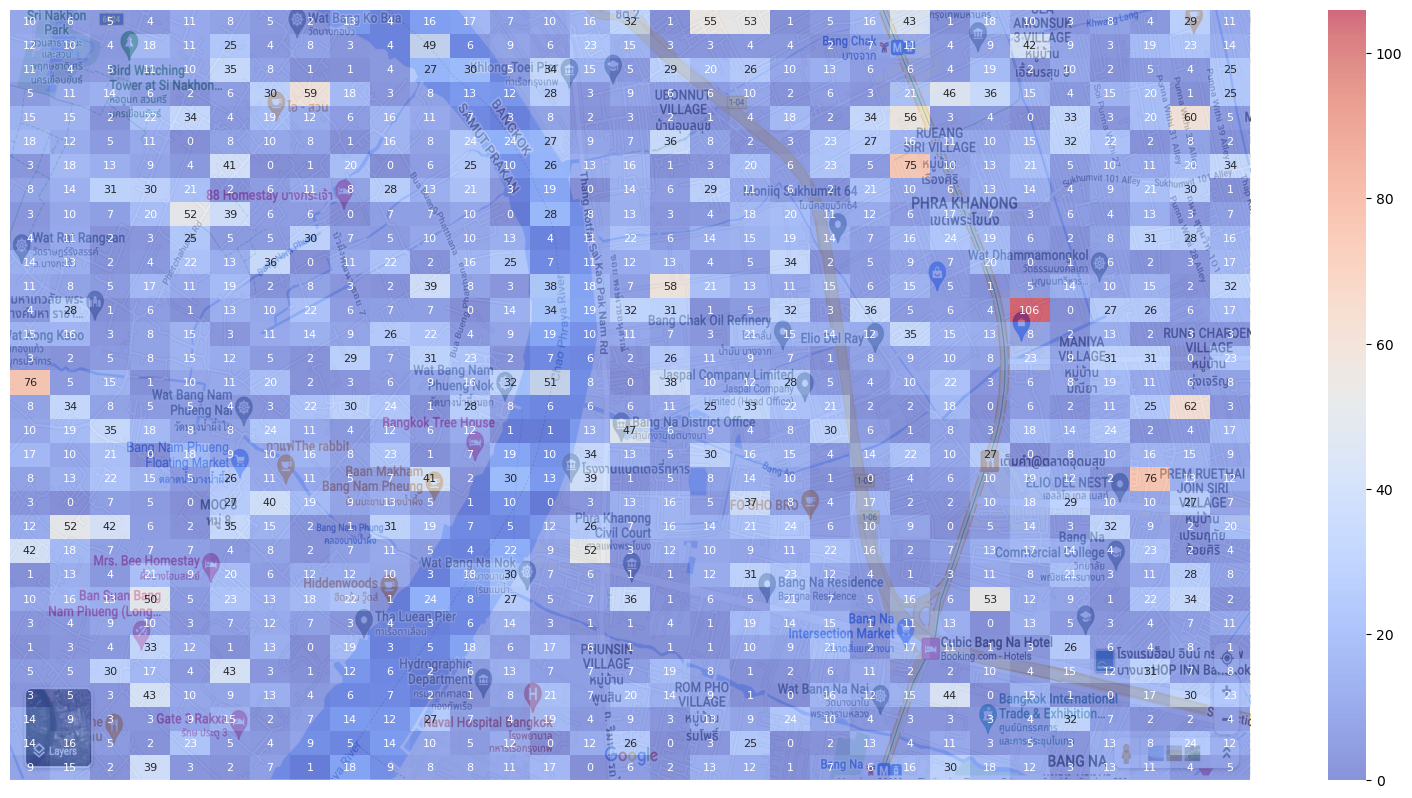

In [25]:
geopulse_mock('inte_coffee_lover')

**Mock of Grid Lover by Worker Segment**

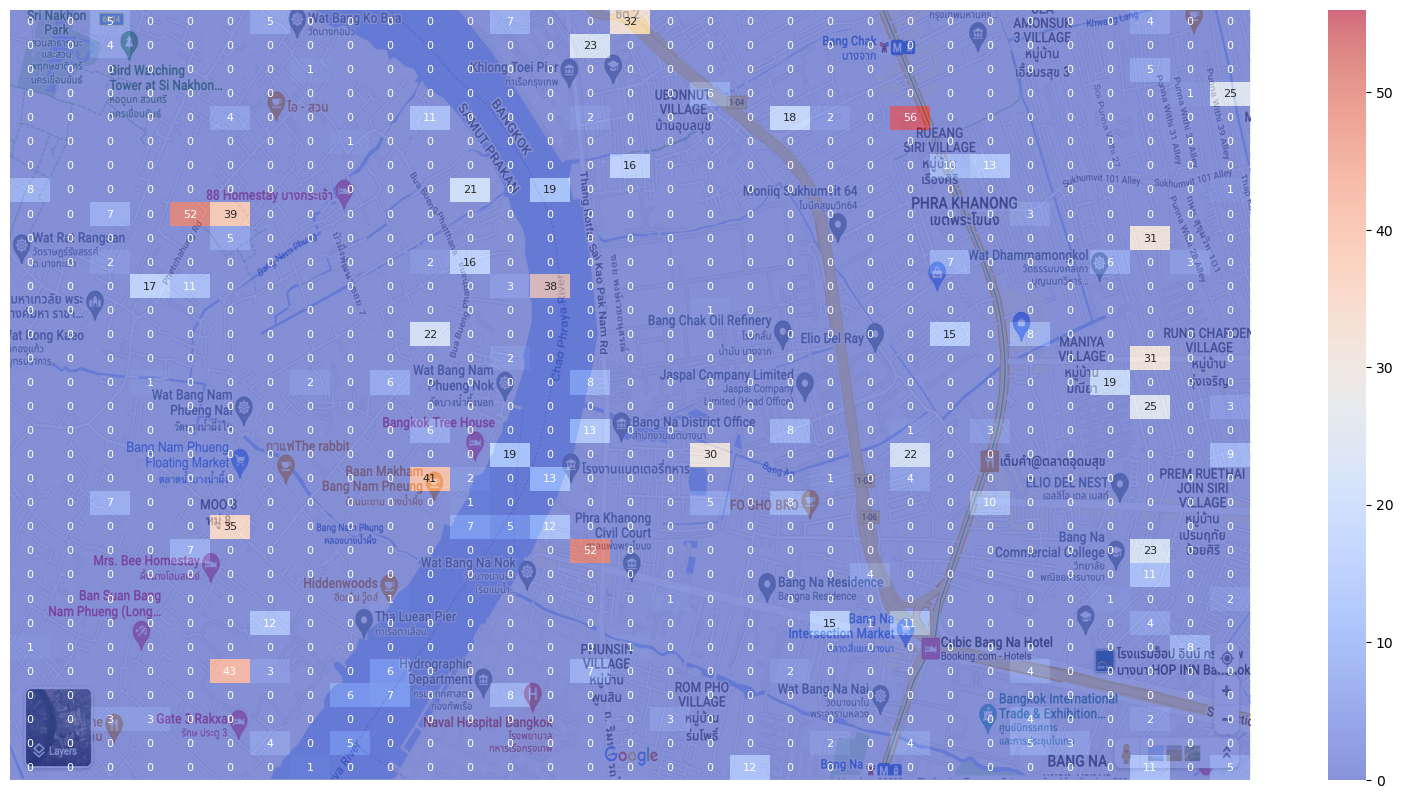

In [26]:
geopulse_mock_subset('inte_coffee_lover','worker')

**Mock up grid of food delivery**

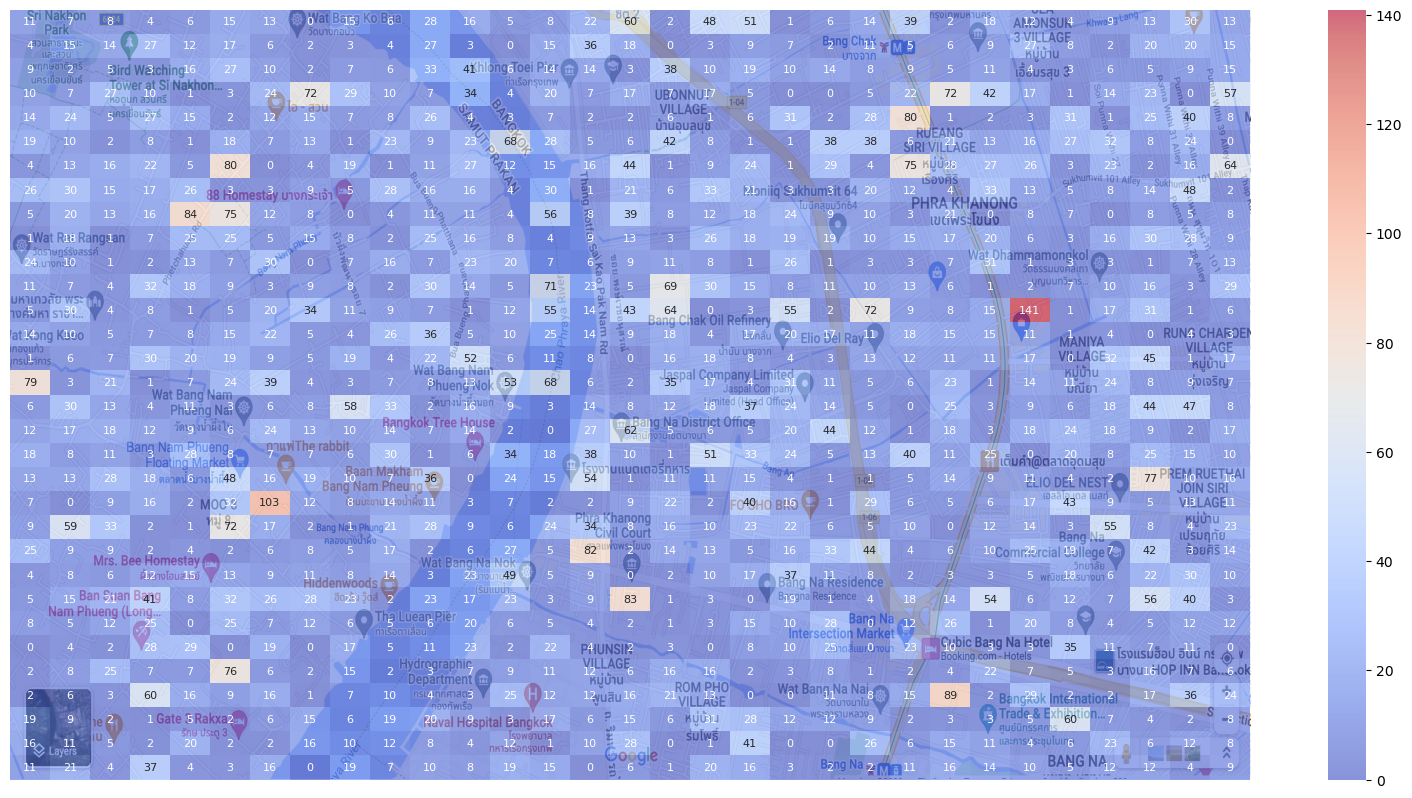

In [27]:
geopulse_mock('food_delivery_app_user')

**Mock up grid of food delivery by segment**

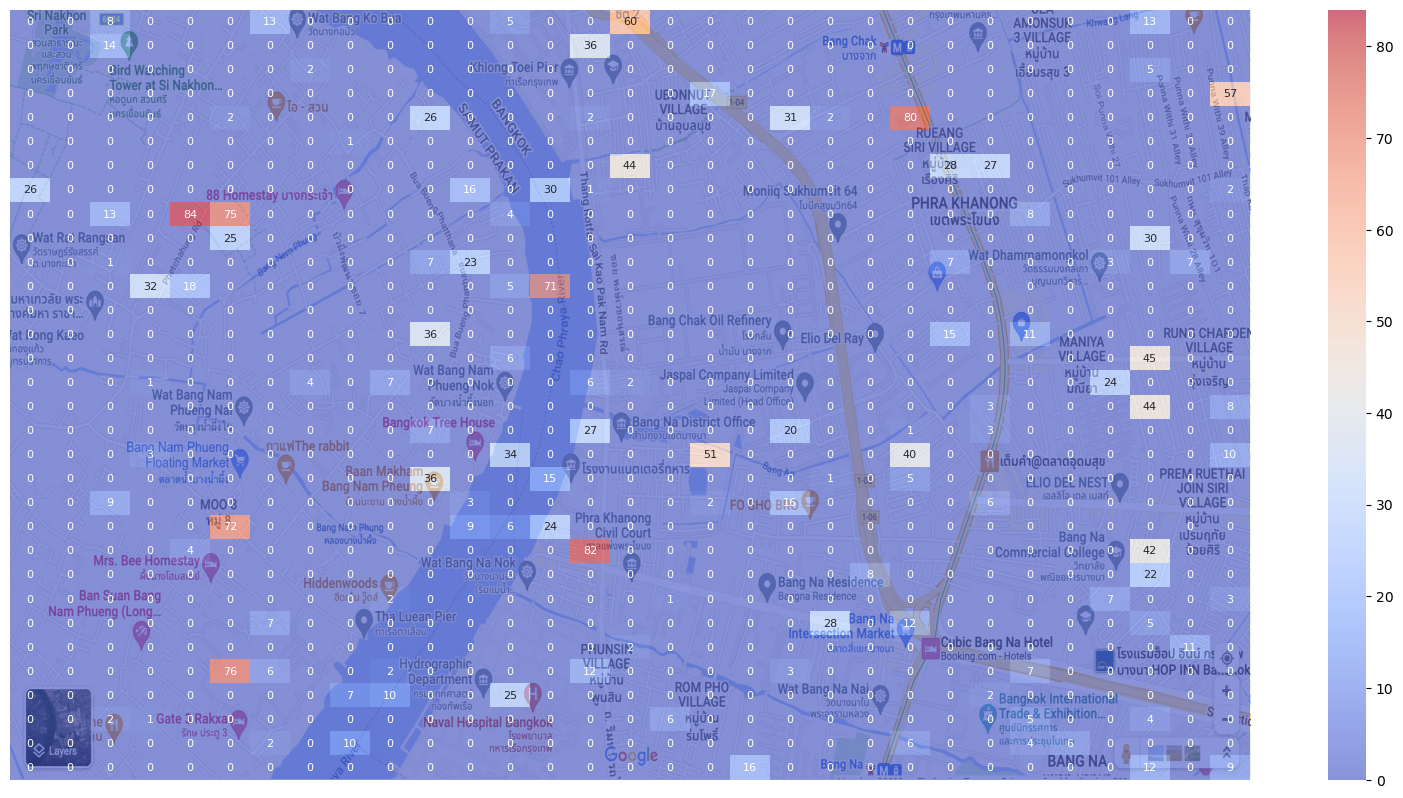

In [28]:
geopulse_mock_subset('food_delivery_app_user','worker')

---